In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.patches import ConnectionPatch
%matplotlib inline

In [2]:
file_mca = pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
file_mca.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [4]:
#changing date column to date format
file_mca['effective_to_date']= pd.to_datetime(file_mca['effective_to_date'])
file_mca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   region                         10689 non-null  object        
 1   customer_lifetime_value        10689 non-null  int64         
 2   response                       10689 non-null  object        
 3   coverage                       10689 non-null  object        
 4   education                      10689 non-null  object        
 5   effective_to_date              10689 non-null  datetime64[ns]
 6   month                          10689 non-null  object        
 7   employment_status              10689 non-null  object        
 8   gender                         10689 non-null  object        
 9   income                         10689 non-null  int64         
 10  location_code                  10689 non-null  object        
 11  marital_status 

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'datetime64[ns]']
numerical = file_mca.select_dtypes(include=numerics)

In [6]:
numerical.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,2011-02-18,48029,61,7,52,0,9,292
1,2228,2011-01-18,92260,64,3,26,0,1,744
2,14947,2011-02-10,22139,100,34,31,0,2,480
3,22332,2011-01-11,49078,97,10,3,0,2,484
4,9025,2011-01-17,23675,117,33,31,0,7,707


In [7]:
categoricals = file_mca.select_dtypes(include=object)

In [8]:
categoricals.head()

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


In [9]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   month              10689 non-null  object
 5   employment_status  10689 non-null  object
 6   gender             10689 non-null  object
 7   location_code      10689 non-null  object
 8   marital_status     10689 non-null  object
 9   policy_type        10689 non-null  object
 10  policy             10689 non-null  object
 11  renew_offer_type   10689 non-null  object
 12  sales_channel      10689 non-null  object
 13  vehicle_class      10689 non-null  object
 14  vehicle_size       10689 non-null  object
dtypes: object(15)
memory usage: 1.2+ MB


Text(0.5, 0.98, 'this the whole figure title')

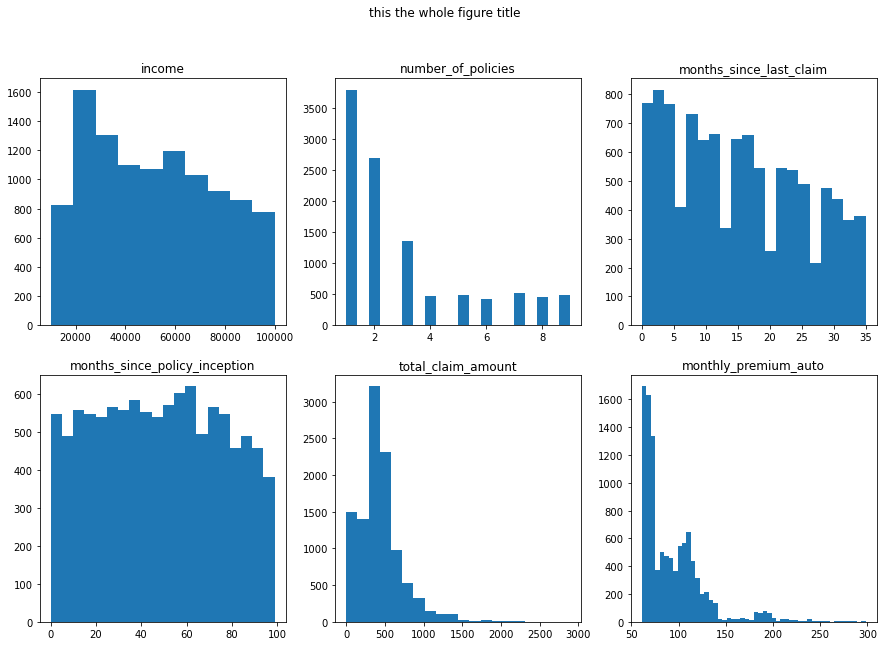

In [10]:
## first axis
fig=plt.figure(figsize=(15,10)) #size of the plot frame
##first subplot
plt.subplot(2,3,1)
plt.hist(numerical["income"])
plt.title("income")
## second subplot
plt.subplot(2,3,2)
plt.hist(numerical["number_of_policies"], bins=20)
plt.title("number_of_policies")

## third subplot
plt.subplot(2,3,3)
plt.hist(numerical["months_since_last_claim"], bins=20)
plt.title("months_since_last_claim")

## fourth subplot
plt.subplot(2,3,4)
plt.hist(numerical["months_since_policy_inception"],bins=20)
plt.title("months_since_policy_inception")

## fifth subplot
plt.subplot(2,3,5)
plt.hist(numerical["total_claim_amount"], bins=20)
plt.title("total_claim_amount")

## sixth subplot
plt.subplot(2,3,6)
plt.hist(numerical["monthly_premium_auto"], bins=50)
plt.title("monthly_premium_auto")

plt.suptitle("this the whole figure title")

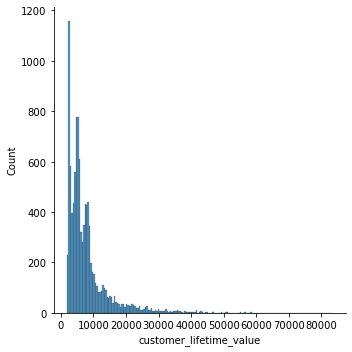

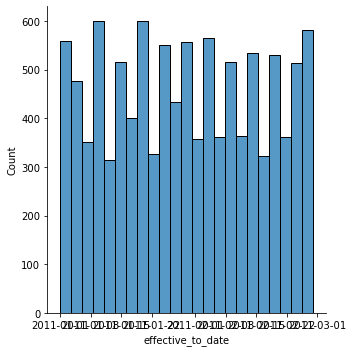

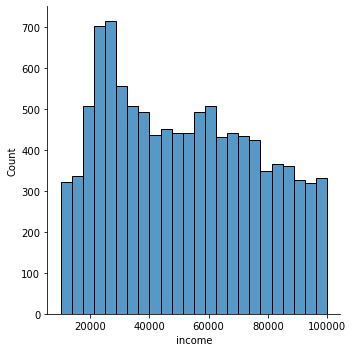

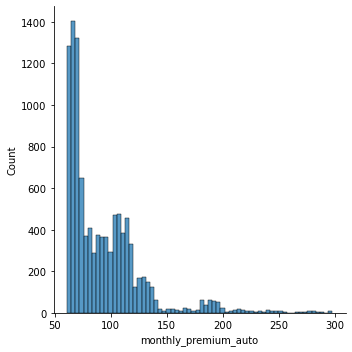

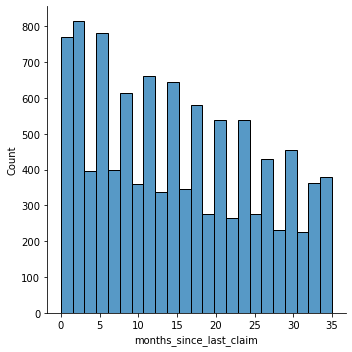

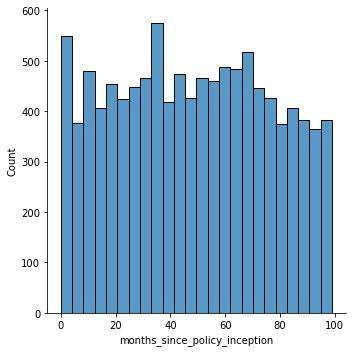

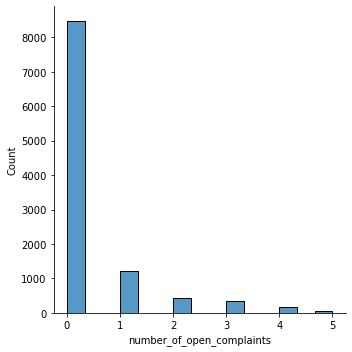

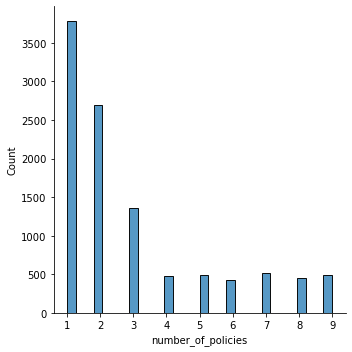

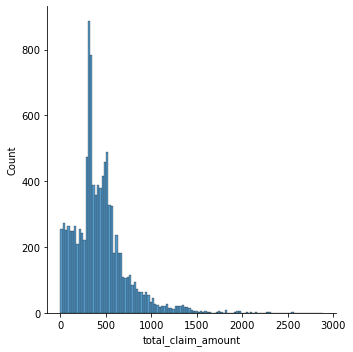

In [11]:
#for loop to plot the same graphs with seaborn lib
for i in range(0, len(numerical.columns)):
    sns.displot(numerical[numerical.columns[i]])

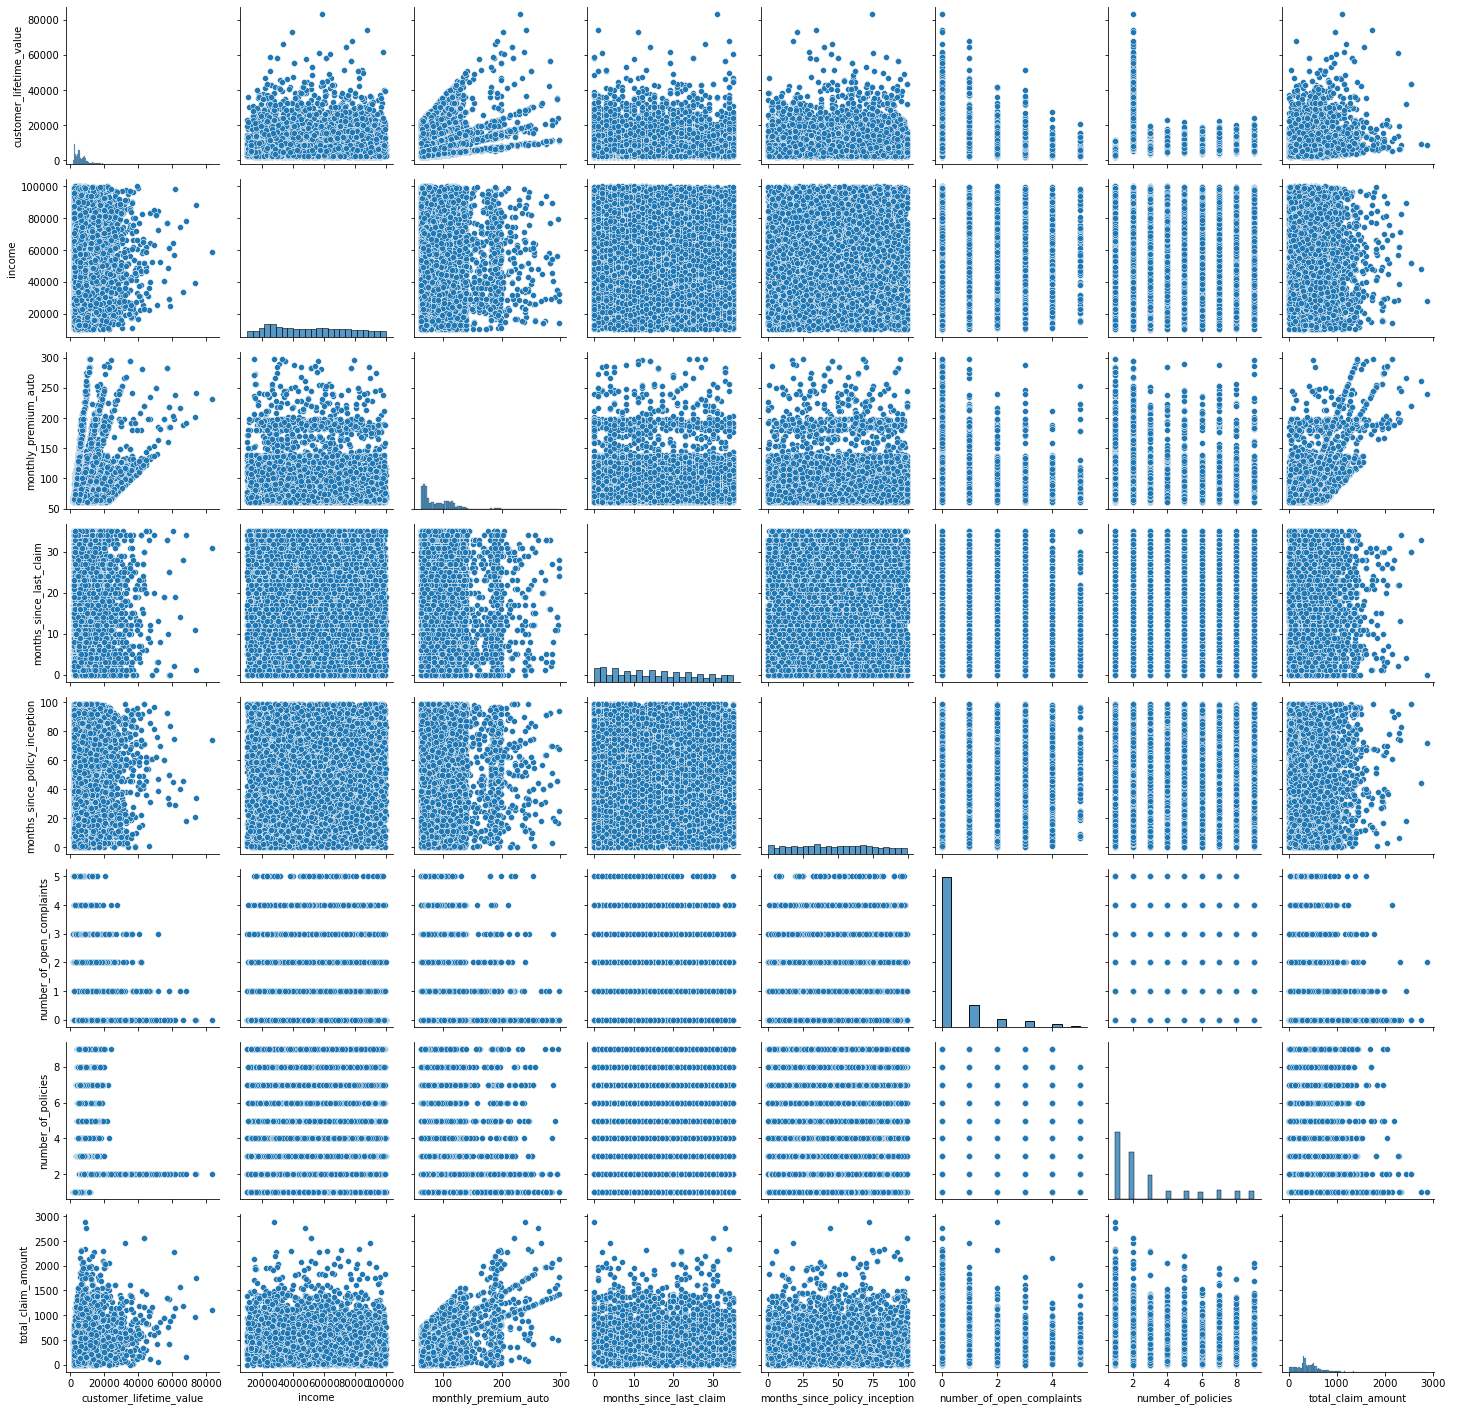

In [12]:
#facet grid to find correlations 
grid = sns.PairGrid(numerical)
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
grid.add_legend()

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

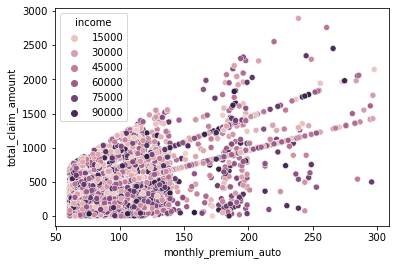

In [13]:
#adding another parameter into correlation grpath
sns.scatterplot(x=numerical["monthly_premium_auto"],y=numerical["total_claim_amount"], hue=numerical["income"])

<AxesSubplot:>

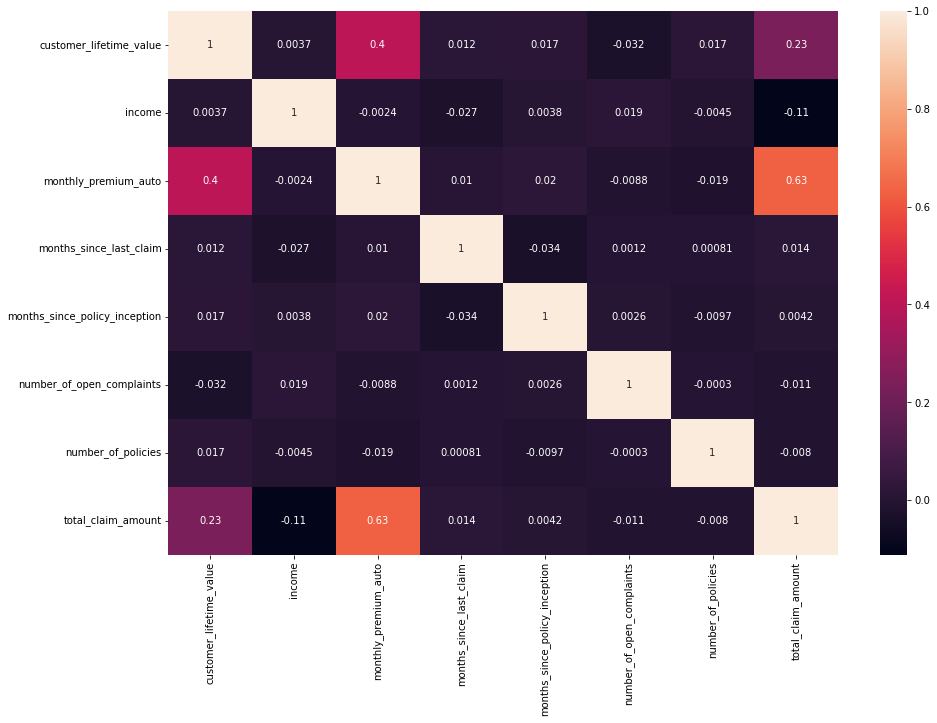

In [14]:
#building heatmap of correlation of all numerical features
fig=plt.figure(figsize=(15,10))
sns.heatmap(numerical.corr(),annot=True)

In [15]:
#facet grid to find correlations 
#grid = sns.PairGrid(numerical, hue="income")
#grid.map_diag(sns.histplot)
#grid.map_offdiag(sns.scatterplot)
#grid.add_legend()

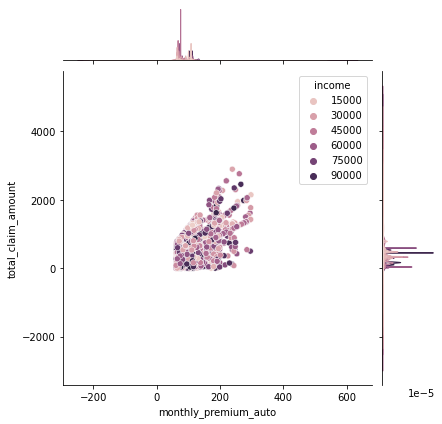

In [16]:
sns.jointplot(data=numerical, x="monthly_premium_auto", y="total_claim_amount", hue="income")

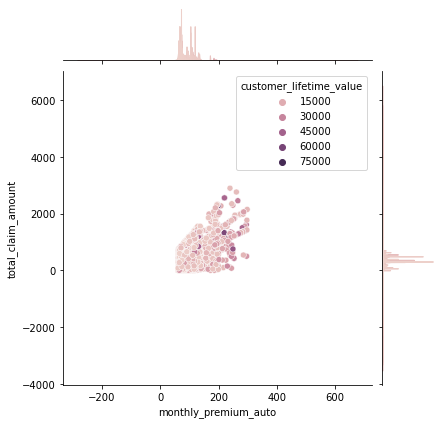

In [17]:
sns.jointplot(data=numerical, x="monthly_premium_auto", y="total_claim_amount", hue="customer_lifetime_value", dropna = True)

<AxesSubplot:xlabel='effective_to_date'>

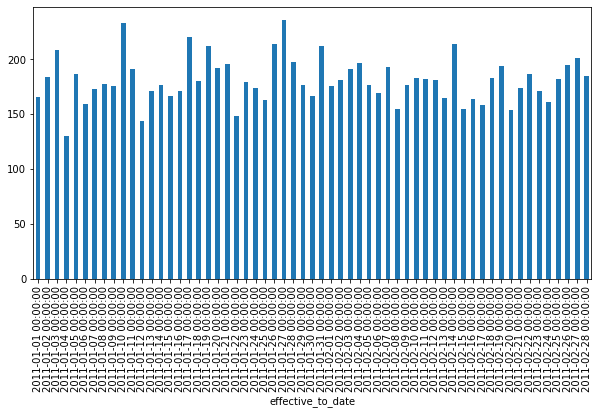

In [18]:
day_groups = file_mca.groupby([file_mca["effective_to_date"]]
                          )["effective_to_date"].count()
day_groups.plot(kind='bar',figsize=(10,5),legend=None)

<AxesSubplot:ylabel='gender'>

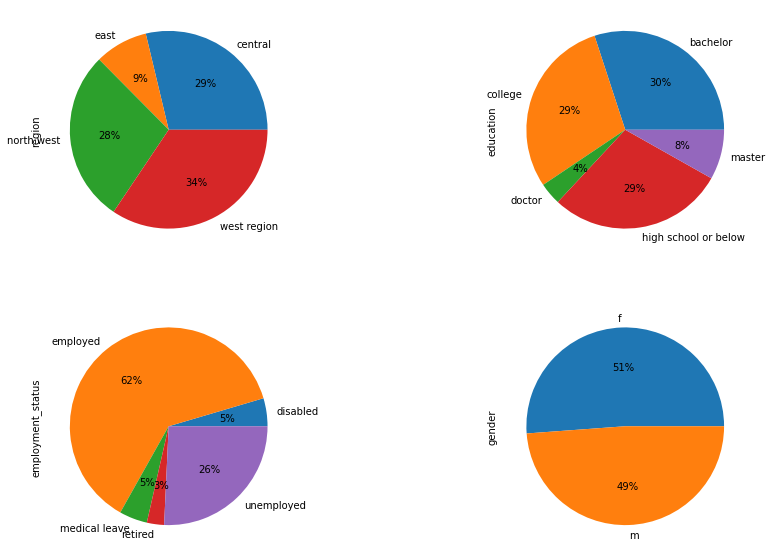

In [19]:
fig=plt.figure(figsize=(15,10))

#pie based on region
plt.subplot(2,2,1)
region_groups = file_mca.groupby([file_mca["region"]])["region"].count()
region_groups.plot.pie(autopct='%1.0f%%')

#pie based on education
plt.subplot(2,2,2)
education_groups = file_mca.groupby([file_mca["education"]])["education"].count()
education_groups.plot.pie(autopct='%1.0f%%')

#pie based on employment_status
plt.subplot(2,2,3)
employment_status_groups = file_mca.groupby([file_mca["employment_status"]])["employment_status"].count()
employment_status_groups.plot.pie(autopct='%1.0f%%')

#pie based on gender
plt.subplot(2,2,4)
gender_groups = file_mca.groupby([file_mca["gender"]])["gender"].count()
gender_groups.plot.pie(autopct='%1.0f%%')

<AxesSubplot:ylabel='sales_channel'>

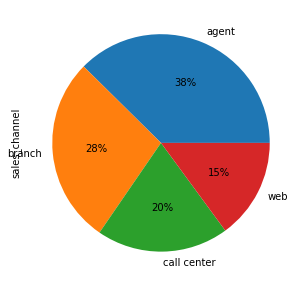

In [20]:
#pie by sales channel
fig=plt.figure(figsize=(8,5))
sales_channel_groups = file_mca.groupby([file_mca["sales_channel"]])["sales_channel"].count()
sales_channel_groups.plot.pie(autopct='%1.0f%%')

<AxesSubplot:title={'center':'income'}, xlabel='education'>

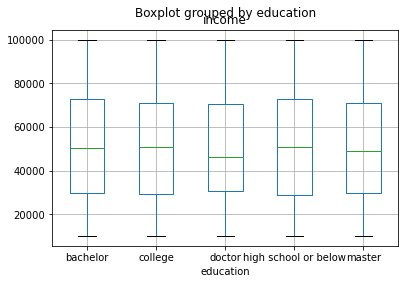

In [32]:
file_mca.boxplot(column='income', by="education")

In [30]:
file_mca["education"].unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)